In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
sys.path.append('../../')
import Constants as c

In [2]:
directoryPath = "../../exports"
file = "{directoryPath}/effort_prediction_performance.csv".format(directoryPath=directoryPath)
df = pd.read_csv(file)

In [3]:
df.drop(df.columns[0], axis=1)
df.dropna(subset=[c.PRED_25], inplace=True)

In [4]:
df.describe()

,Unnamed: 0,R_Squared,R_Squared_Adj,MAE,MSE,RMSE,PRED_25,PRED_50,T_Records
count,822.0,818.00,815.00,822.000000,8.220000e+02,822.000000,822.000000,822.000000,822.000000
mean,0.0,-inf,-inf,7526.232506,4.212888e+09,13581.369173,0.328589,0.474258,1344.963504
std,0.0,NaN,NaN,35982.924817,3.848921e+10,63508.592228,0.264297,0.271861,1318.058472
min,0.0,-inf,-inf,0.000000,0.000000e+00,0.000000,0.000000,0.000000,20.000000
25%,0.0,0.54,0.52,16.262500,5.990850e+02,24.477500,0.120000,0.260000,410.000000
50%,0.0,0.80,0.78,145.185000,5.761556e+04,240.030000,0.260000,0.470000,980.000000
75%,0.0,0.93,0.92,1375.027500,5.938929e+06,2436.935000,0.500000,0.670000,1820.000000
max,0.0,1.00,1.00,582850.200000,8.877357e+11,942197.290000,1.000000,1.000000,8870.000000


In [5]:
def hypothesisTest_Effort(model, mean):
    print("t-test for: {0}".format(model))
    model_records = df[df[c.MODEL] == model]
    model_records_mean = model_records[c.PRED_25].mean()
    print(model_records_mean)
    ttest_result = ttest_1samp(model_records[c.PRED_25], mean)
    print("p-value: ", ttest_result.pvalue / 2)

    if ttest_result.pvalue / 2 < 0.10:
        print("Rejecting null hypothesis!")
    else:
        print("Accepting null hypothesis!")
    
    model_records[c.PRED_25].plot.hist(bins=5, alpha=0.5)


t-test for: Line_CC
0.16197183098591553
p-value:  1.0307765570164971e-36
Rejecting null hypothesis!


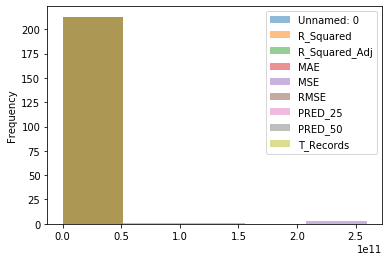

In [6]:
# t-test
hypothesisTest_Effort(c.LINE_CC, 0.33)

In [7]:
# t-test
hypothesisTest_Effort(c.LINE_EC, 0.33)

t-test for: Line_EC
0.3910606060606062
p-value:  0.0018500070129208806
Rejecting null hypothesis!


ValueError: autodetected range of [-inf, 887735733279.05] is not finite

In [8]:
# t-test
hypothesisTest_Effort(c.MODULE_CC, 0.54)

t-test for: Module_CC
0.28953051643192473
p-value:  1.8832983156874386e-42
Rejecting null hypothesis!


ValueError: autodetected range of [-inf, 9831769.37] is not finite

In [9]:
# t-test
hypothesisTest_Effort(c.MODULE_EC, 0.54)

t-test for: Module_EC
0.4873737373737373
p-value:  0.0026318195873556464
Rejecting null hypothesis!


ValueError: autodetected range of [-inf, 578418502.86] is not finite